# Feature Engineering (Create better features)
- Process of transforming raw data into meaningful features that help the model to learn patterns better.

## Numerical Feature Engineering
### a. Scaling

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load teh wine dataset 
wine = load_wine()

In [8]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# Create a dataframe
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = wine.target

In [5]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

When to use:
- Linear models
- PCA
- KNN
- SVM
- Neural Networks

### b. Log/Power Transformations

In [10]:
import numpy as np

X['log_proanthocyanins'] = np.log1p(X['proanthocyanins'])

In [13]:
X['proline'].max()

1680.0

Used when:
- Long-tailed Distribution
- Financial Data
- Population, Sales, prices

### c. Binning (Discretization)

In [16]:
import pandas as pd
df = pd.DataFrame(X)

In [18]:
df['Grouped_proline'] = pd.cut(
    df['proline'],
    bins = [0, 300, 600, 900, 1200, 1500, 1800],
    labels = ['Smallest', 'Smaller', 'Small', 'Big', 'Bigger', 'Biggest']
)


In [19]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,log_proanthocyanins,Grouped_proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.190888,Big
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.824175,Big
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.337629,Big
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.156881,Bigger
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.036737,Small


Useful When:
- Non-Linear Relationships
- Tree-based models
- Explainability matters

## Categorical Feature Engineering
### a. Label Encoding
- It is used when order matters

In [20]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv'
df2 = pd.read_csv(url)
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [22]:
df2['class_'] = le.fit_transform(df2['class'])
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2


### b. One-Hot Encoder (Nominal Data)
Best for:
- Linear Models
- Logistic Regression

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first')
encoded = encoder.fit_transform(df2[['embark_town']])

In [30]:
df3 = pd.DataFrame(encoded)

In [31]:
df3

,0
0,"(0, 1)\t1.0"
1,
2,"(0, 1)\t1.0"
3,"(0, 1)\t1.0"
4,"(0, 1)\t1.0"
...,...
886,"(0, 1)\t1.0"
887,"(0, 1)\t1.0"
888,"(0, 1)\t1.0"
889,


### c. Frequency / Target Encoding

# Date and Time Feature Engineering

In [35]:
import seaborn as sns
flight = sns.load_dataset('flights')
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [36]:
dates = pd.date_range(start = '2026-01-01', periods = 100, freq = "D")
df = pd.DataFrame({'date' : dates, 'Value' : np.random.randn(100)})
df.head()

,date,Value
0,2026-01-01,-0.666889
1,2026-01-02,-0.330615
2,2026-01-03,0.995257
3,2026-01-04,1.176896
4,2026-01-05,-0.663763


In [39]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5,6]).astype(int)

In [40]:
df.head()

,date,Value,year,month,day,weekday,is_weekend
0,2026-01-01,-0.666889,2026,1,1,3,0
1,2026-01-02,-0.330615,2026,1,2,4,0
2,2026-01-03,0.995257,2026,1,3,5,1
3,2026-01-04,1.176896,2026,1,4,6,1
4,2026-01-05,-0.663763,2026,1,5,0,0


# 2. Feature Selection 
Feature Selection removes:
- Redundant features
- Irrelevant Features
- Noisy features

## 1. Filter Methods

### a. Correlation Based selection 

In [41]:
df.head()

,date,Value,year,month,day,weekday,is_weekend
0,2026-01-01,-0.666889,2026,1,1,3,0
1,2026-01-02,-0.330615,2026,1,2,4,0
2,2026-01-03,0.995257,2026,1,3,5,1
3,2026-01-04,1.176896,2026,1,4,6,1
4,2026-01-05,-0.663763,2026,1,5,0,0


In [52]:
df['year'].unique

<bound method Series.unique of 0     2026
1     2026
2     2026
3     2026
4     2026
      ... 
95    2026
96    2026
97    2026
98    2026
99    2026
Name: year, Length: 100, dtype: int32>

In [43]:
df_ = df[['Value', 'month', 'day', 'weekday', 'is_weekend']]

In [44]:
df_.head()

,Value,month,day,weekday,is_weekend
0,-0.666889,1,1,3,0
1,-0.330615,1,2,4,0
2,0.995257,1,3,5,1
3,1.176896,1,4,6,1
4,-0.663763,1,5,0,0


In [45]:
import matplotlib.pyplot as plt

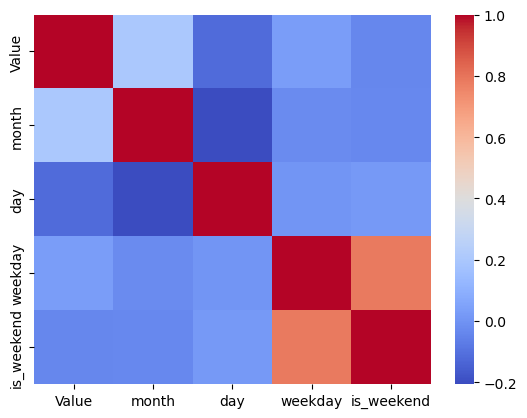

In [46]:
corr = df_.corr()
sns.heatmap(corr, cmap = 'coolwarm')
plt.show()

In [50]:
# Drop the highly correlated features
df_ = df_.drop(columns = ['is_weekend'])

In [51]:
df_.head()

,Value,month,day,weekday
0,-0.666889,1,1,3
1,-0.330615,1,2,4
2,0.995257,1,3,5
3,1.176896,1,4,6
4,-0.663763,1,5,0


### b. Variance Threshold

In [53]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold = 0.01)
df_reduced = selector.fit_transform(df_)

In [56]:
df_reduced = pd.DataFrame(df_reduced)
df_reduced.head()

,0,1,2,3
0,-0.666889,1.0,1.0,3.0
1,-0.330615,1.0,2.0,4.0
2,0.995257,1.0,3.0,5.0
3,1.176896,1.0,4.0,6.0
4,-0.663763,1.0,5.0,0.0


## 2. Wrapper Methods
### Recursive Feature Elimination

In [62]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2


In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
rfe = RFE(model, n_features_to_select = 3)

X = df2[['pclass', "sibsp", "parch", 'fare']]
y = df2['survived']
X_selected = rfe.fit_transform(X, y)

In [67]:
X_selected

array([[3., 1., 0.],
       [1., 1., 0.],
       [3., 0., 0.],
       ...,
       [3., 1., 2.],
       [1., 0., 0.],
       [3., 0., 0.]])

## Task:
- Perform Embedded methods
    - L1 Regularization 
    - Tree-Based Feature Importance
